# Codigo Ejercicio 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.fftpack import fft, fftshift,fftfreq
plt.rcParams.update( { 'font.size':16, 'figure.figsize': (16,9) } )

In [2]:
def calcular_fft( x_c, Fs, N ):
    if( type( N ) != int ):
        resultados = {
            'N': [],
            'X': [],
            'shift_X': [],
            'freq': []
        }
        for N_ in N:
            resultado = calcular_fft( x_c, Fs, N )
            resultados['N'].append( N_ )
            resultados['freq'].append( resultado['freq']  )
            resultados['X'].append( resultado['X'] )
            resultados['shift_X'].append( resultado['shift_X'] )
    else:        
        n = np.arange( 0, N, 1 )
        x = lambda n: x_c( n / Fs )
        x_e = x(n)
        X = fft( x_e ) 
        freq = fftshift( fftfreq( N ) ) * Fs
        resultados = {
            'X': X,
            'shift_X': fftshift( X ),
            'freq': freq
        }
    
    return resultados

In [15]:
Fs = 400
x_c = lambda t: np.sin(200 *np.pi*t)
x = lambda n: np.sin( np.pi * n / 2 )  

In [17]:
X = calcular_fft( x_c, Fs, 4 )['X']

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


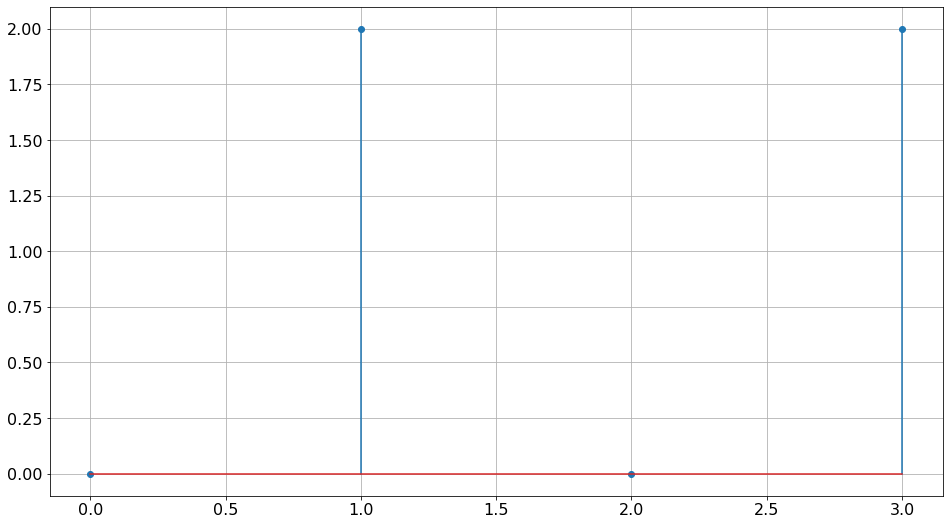

In [18]:
plt.stem( np.abs( X ) )
plt.grid()

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


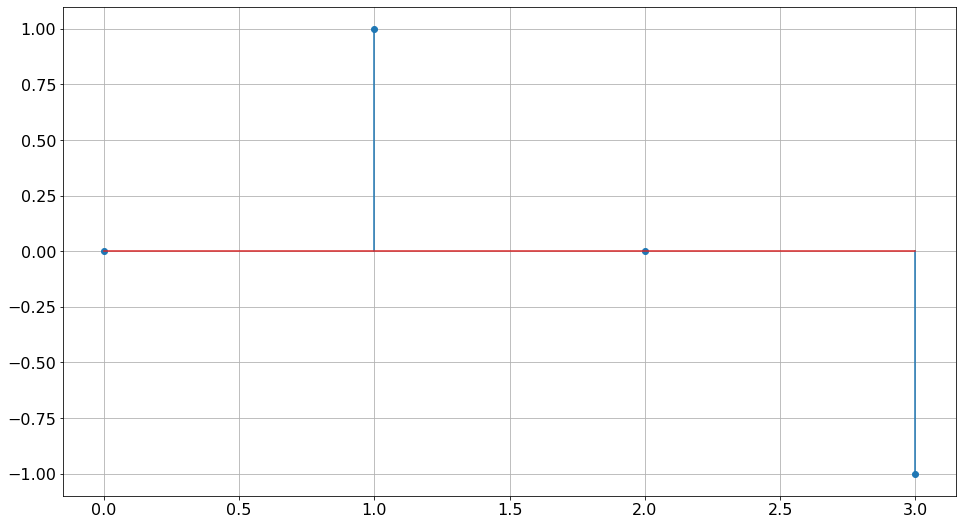

In [7]:
plt.stem( x_c( np.arange( 0, 4, 1) / Fs ) )
plt.grid()